In [0]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS  = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #data is a batch of feature sets and labels
    X ,y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()

    print(loss)




Streaming output truncated to the last 5000 lines.
tensor(0.0186, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor(0.0101, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0740, grad_fn=<NllLossBackward>)
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor(0.0200, grad_fn=<NllLossBackward>)
tensor(0.0893, grad_fn=<NllLossBackward>)
tensor(0.3244, grad_fn=<NllLossBackward>)
tensor(0.0306, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor(0.2269, grad_fn=<NllLossBackward>)
tensor(0.0128, grad_fn=<NllLossBackward>)
tensor(0.0373, grad_fn=<NllLossBackward>)
tensor(0.2111, grad_fn=<NllLossBackward>)
tensor(0.0724, grad_fn=<NllLossBackward>)
tensor(0.0715, grad_fn=<NllLossBackward>)
tensor(0.0186, grad_fn=<NllLossBackward>)
tensor(0.0161, grad_fn=<NllLossBackward>)
tensor(0.0305, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0287, grad_fn=<N

In [0]:
correct = 0
total = 0

with torch.no_grad():
  #net.train() ....net.eval()//part of old coding style , here torch.no_grad() replaces this
  for data in trainset:
    X,y = data
    output  = net(X.view(-1,784))
    for idx , i in enumerate(output):
       if torch.argmax(i)==y[idx]:
          correct+=1
          total+=1

          print("Accuracy: ",round(correct/total,3))

In [0]:
X



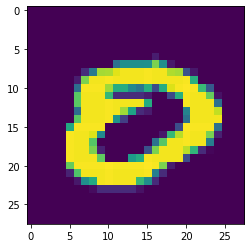

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28))
plt.show()


In [0]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(0)
